# Analysis of Heart Disease Data Set

#### imports

In [1]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### import dataset

In [2]:
heart = pd.read_csv("./heart.csv")
heart.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

### create boolean columns for chest pain types

In [3]:
heart["typical_angina"] = heart["cp"].apply(lambda x: 1 if x == 1 else 0)
heart["atypical_angina"] = heart["cp"].apply(lambda x: 1 if x == 2 else 0)
heart["non_angina"] = heart["cp"].apply(lambda x: 1 if x == 3 else 0)
heart["asymptomatic"] = heart["cp"].apply(lambda x: 1 if x in [0, 4] else 0)
heart

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  typical_angina  atypical_angina  non_angina  \
0        0   0     1       1               0                0           1   
1        0   0     2       1               0                1           0   
2        2   0     2       1               1                0           0   
3        2   0     2       1               1                0           0   
4        2   0     2       1               0                0           0   
..     ...  ..   ...     ...             ...              ...         ...   
298      1   0     3       0               0                0           0   
299      1   0     3       0               0                0           1   
300      1   2     3       0               0                0           0   
301      1   1     3       0               0                0           0   
302      1   1     2       0               1                0           0   

     asymptomatic  
0               0  
1               0  
2               0  
3               0  
4               1  
..            ...  
298             1  
299             0  
300             1  
301             1  
302             0  

[303 rows x 18 columns]

### heatmap of heart database correlations

<AxesSubplot:>

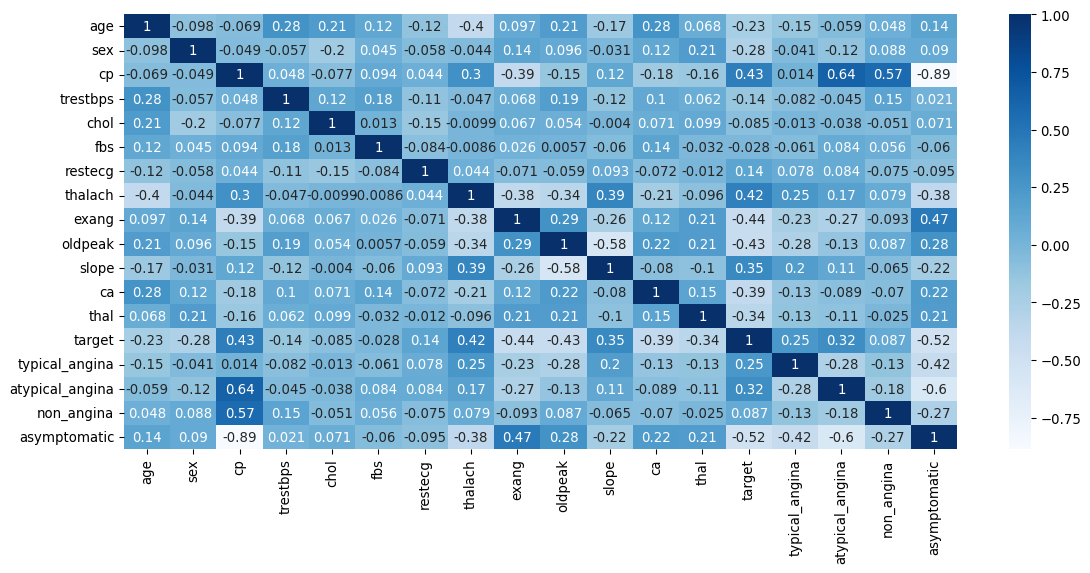

In [4]:
plt.figure(figsize=(14, 6), dpi=96) 
sns.heatmap(heart.corr(), annot=True, cmap="Blues")

### separate data into training and test set (10% test set)

In [5]:
heart_train, heart_test = train_test_split(heart, test_size=0.1, random_state=42)
display(heart_train)
display(heart_test)
display(len(heart_test))

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
284   61    1   0       140   207    0        0      138      1      1.9   
198   62    1   0       120   267    0        1       99      1      1.8   
42    45    1   0       104   208    0        0      148      1      3.0   
17    66    0   3       150   226    0        1      114      0      2.6   
168   63    1   0       130   254    0        0      147      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
188   50    1   2       140   233    0        1      163      0      0.6   
71    51    1   2        94   227    0        1      154      1      0.0   
106   69    1   3       160   234    1        0      131      0      0.1   
270   46    1   0       120   249    0        0      144      0      0.8   
102   63    0   1       140   195    0        1      179      0      0.0   

     slope  ca  thal  target  typical_angina  atypical_angina  non_angina  \
284      2   1     3       0               0                0           0   
198      1   2     3       0               0                0           0   
42       1   0     2       1               0                0           0   
17       0   0     2       1               0                0           1   
168      1   1     3       0               0                0           0   
..     ...  ..   ...     ...             ...              ...         ...   
188      1   1     3       0               0                1           0   
71       2   1     3       1               0                1           0   
106      1   1     2       1               0                0           1   
270      2   0     3       0               0                0           0   
102      2   2     2       1               1                0           0   

     asymptomatic  
284             1  
198             1  
42              1  
17              0  
168             1  
..            ...  
188             0  
71              0  
106             0  
270             1  
102             0  

[272 rows x 18 columns]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
179   57    1   0       150   276    0        0      112      1      0.6   
228   59    1   3       170   288    0        0      159      0      0.2   
111   57    1   2       150   126    1        1      173      0      0.2   
246   56    0   0       134   409    0        0      150      1      1.9   
60    71    0   2       110   265    1        0      130      0      0.0   
9     57    1   2       150   168    0        1      174      0      1.6   
119   46    0   0       138   243    0        0      152      1      0.0   
223   56    0   0       200   288    1        0      133      1      4.0   
268   54    1   0       122   286    0        0      116      1      3.2   
33    54    1   2       125   273    0        0      152      0      0.5   
5     57    1   0       140   192    0        1      148      0      0.4   
101   59    1   3       178   270    0        0      145      0      4.2   
45    52    1   1       120   325    0        1      172      0      0.2   
175   40    1   0       110   167    0        0      114      1      2.0   
118   46    0   1       105   204    0        1      172      0      0.0   
46    44    1   2       140   235    0        0      180      0      0.0   
125   34    0   1       118   210    0        1      192      0      0.7   
192   54    1   0       120   188    0        1      113      0      1.4   
285   46    1   0       140   311    0        1      120      1      1.8   
279   61    1   0       138   166    0        0      125      1      3.6   
152   64    1   3       170   227    0        0      155      0      0.6   
269   56    1   0       130   283    1        0      103      1      1.6   
272   67    1   0       120   237    0        1       71      0      1.0   
25    71    0   1       160   302    0        1      162      0      0.4   
146   44    0   2       118   242    0        1      149      0      0.3   
283   40    1   0       152   223    0        1      181      0      0.0   
254   59    1   3       160   273    0        0      125      0      0.0   
73    51    1   0       140   261    0        0      186      1      0.0   
231   57    1   0       165   289    1        0      124      0      1.0   
109   50    0   0       110   254    0        0      159      0      0.0   
139   64    1   0       128   263    0        1      105      1      0.2   

     slope  ca  thal  target  typical_angina  atypical_angina  non_angina  \
179      1   1     1       0               0                0           0   
228      1   0     3       0               0                0           1   
111      2   1     3       1               0                1           0   
246      1   2     3       0               0                0           0   
60       2   1     2       1               0                1           0   
9        2   0     2       1               0                1           0   
119      1   0     2       1               0                0           0   
223      0   2     3       0               0                0           0   
268      1   2     2       0               0                0           0   
33       0   1     2       1               0                1           0   
5        1   0     1       1               0                0           0   
101      0   0     3       1               0                0           1   
45       2   0     2       1               1                0           0   
175      1   0     3       0               0                0           0   
118      2   0     2       1               1                0           0   
46       2   0     2       1               0                1           0   
125      2   0     2       1               1                0           0   
192      1   1     3       0               0                0           0   
285      1   2     3       0               0                0           0   
279      1   1     2       0    

31

### Create input and output variables

In [6]:
INPUT_VARS = ["age", "sex", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "typical_angina", "atypical_angina", "non_angina", "asymptomatic"]
OUTPUT_VARS = ["target"]

### Linear regression model

In [7]:
all_model = LinearRegression()
all_model.fit(heart_train[INPUT_VARS], heart_train[OUTPUT_VARS])
display(all_model.coef_)
display(all_model.intercept_)

array([[-0.00149195, -0.19141793, -0.00214537, -0.00036135,  0.01641252,
         0.04437898,  0.00224941, -0.14932769, -0.04770626,  0.10822548,
        -0.10276367, -0.11507544,  0.01471425,  0.06245408,  0.11884135,
        -0.19600967]])

array([1.10776835])

### Linear regressions for top 4 correlated independent values

#### Linear regression trained on gender data

In [8]:
gender_train = heart_train[heart_train["sex"] == 1]
gender_test = heart_test[heart_test["sex"] == 1]
gender_model = LinearRegression()
gender_model.fit(gender_train[INPUT_VARS], gender_train["target"])
gender_model.score(gender_test[INPUT_VARS], gender_test["target"])

0.3012293598951675

#### Linear regression trained on atypical angina data

In [9]:
at_angina_train = heart_train[heart_train["atypical_angina"] != 1]
at_angina_test = heart_test[heart_test["atypical_angina"] != 1]
at_angina_model = LinearRegression()
at_angina_model.fit(at_angina_train[INPUT_VARS], at_angina_train["target"])
at_angina_model.score(at_angina_test[INPUT_VARS], at_angina_test["target"])

0.2850986988843157

#### Linear regression trained on non-angina data

In [10]:
non_angina_train = heart_train[heart_train["non_angina"] != 1]
non_angina_test = heart_test[heart_test["non_angina"] != 1]
non_angina_model = LinearRegression()
non_angina_model.fit(non_angina_train[INPUT_VARS], non_angina_train["target"])
non_angina_model.score(non_angina_test[INPUT_VARS], non_angina_test["target"])

0.5786919765055112

#### Linear regression trained on asymptomatic data

In [11]:
asymptomatic_train = heart_train[heart_train["asymptomatic"] == 1]
asymptomatic_test = heart_test[heart_test["asymptomatic"] == 1]
asymptomatic_model = LinearRegression()
asymptomatic_model.fit(asymptomatic_train[INPUT_VARS], asymptomatic_train["target"])
asymptomatic_model.score(asymptomatic_test[INPUT_VARS], asymptomatic_test["target"])

0.2433137816439791

#### Linear regression trained on exercise enduced angina data

--added after fixing my asymptomatic lambda function

In [12]:
exang_train = heart_train[heart_train["exang"] != 1]
exang_test = heart_test[heart_test["exang"] != 1]
exang_model = LinearRegression()
exang_model.fit(exang_train[INPUT_VARS], exang_train["target"])
exang_model.score(exang_test[INPUT_VARS], exang_test["target"])

0.33370505238584225

### What does this all mean?

#### The top predicting factors for heart disease in order are: 
1)non-angina heart pain 

2)excercise-enduced angina 

3)male gender 

4)atypical angina 

5)asymptomatic angina. 

I'm guessing that the more specific set of train & tests is more acurate because it is training with one variable, so there is less noise in the data. We use the all model Linear regression to generate specific variables to test. I'd imagine that next steps would be to use this data to hypothesize about what data to train and test in combinations of variables to learn about nuanced health factors in a complex system.